# Python Wrapper와 SKlearn Wrapper 있음.

In [1]:
conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.14.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-3.3.2             |   py39he80948d_0         1.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.8 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/linux-64::lightgbm-3.3.2-py39he80948d_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    anaconda::ca-certificates-2022.07.19-~ --> conda-forge::ca-certificates-2022.6.15-ha878542_0



lightgbm-

In [1]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=42)
lgbm_wrapper = LGBMClassifier(n_estimators=400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.588284
[2]	valid_0's binary_logloss: 0.525044
[3]	valid_0's binary_logloss: 0.473098
[4]	valid_0's binary_logloss: 0.432445
[5]	valid_0's binary_logloss: 0.393757
[6]	valid_0's binary_logloss: 0.358826
[7]	valid_0's binary_logloss: 0.328248
[8]	valid_0's binary_logloss: 0.304146
[9]	valid_0's binary_logloss: 0.283869
[10]	valid_0's binary_logloss: 0.265547
[11]	valid_0's binary_logloss: 0.244191
[12]	valid_0's binary_logloss: 0.229185
[13]	valid_0's binary_logloss: 0.217378
[14]	valid_0's binary_logloss: 0.204076
[15]	valid_0's binary_logloss: 0.193684
[16]	valid_0's binary_logloss: 0.183553
[17]	valid_0's binary_logloss: 0.17687
[18]	valid_0's binary_logloss: 0.171215
[19]	valid_0's binary_logloss: 0.162097
[20]	valid_0's binary_logloss: 0.15511
[21]	valid_0's binary_logloss: 0.151133
[22]	valid_0's binary_logloss: 0.146962
[23]	valid_0's binary_logloss: 0.142177
[24]	valid_0's binary_logloss: 0.139704
[25]	valid_0's binary_logloss: 0.1371
[26]	valid_0'

In [4]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Acuracy: {0:.4f}, precision: {1:.4f}, 재현율: {2:.4f},\
           AUC:{3:.4f}'.format(accuracy, precision, recall, roc_auc))
    

In [5]:
get_clf_eval(y_test, preds, pred_proba)

Confusion Matrix
[[41  2]
 [ 1 70]]
Acuracy: 0.9737, precision: 0.9722, 재현율: 0.9859,           AUC:0.9908


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

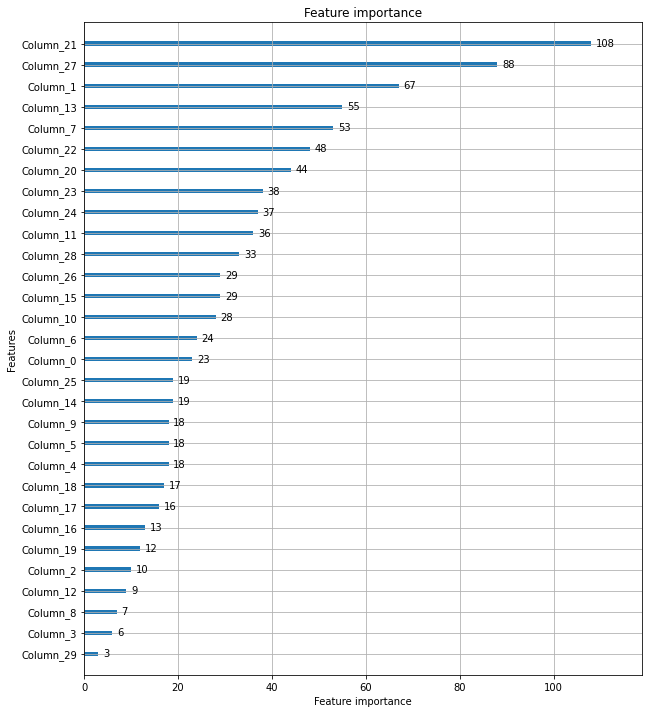

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize= (10, 12))
plot_importance(lgbm_wrapper, ax=ax)